# Insurance Claims Fraud Detection Project

# Problem Statement:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
%matplotlib inline
# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# READ THE DATA
df = pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
# checking the shape
df.shape

(1000, 40)

In [ ]:
# checking the data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
# checking columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [ ]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [ ]:
#Checking for messing values
df.isna().sum()


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number',
    'policy_csl',
    'insured_zip',
    'policy_bind_date',
    'incident_date',
    'incident_location',
    '_c39',
    'auto_year',
    'incident_hour_of_the_day',
       ])

df.head(5)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,?,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N


In [ ]:
# UNIVIRATE ANALYSIS

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [ ]:
#cheking  the value count
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

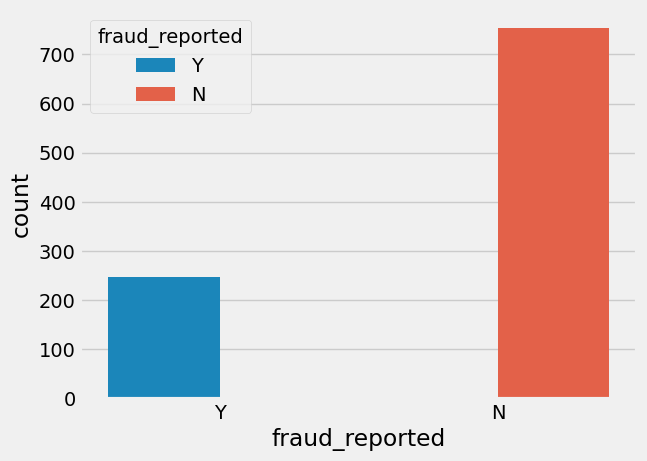

In [ ]:
#plot value counts
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

From above plot, like most fraud datasets, the label distribution is skewed.

In [ ]:
# converting targent into 0 and 1
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()


,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,92x,1
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,?,5070,780,780,3510,Mercedes,E400,1
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,0
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,RSX,0


In [ ]:
#cheking  the value count
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

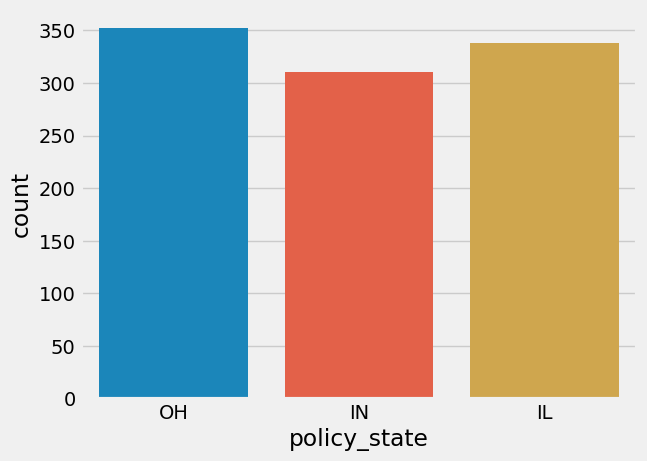

In [ ]:
#plot value counts
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='policy_state', data=df)

In [ ]:
#cheking  the value count
df['insured_sex'].value_counts()


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

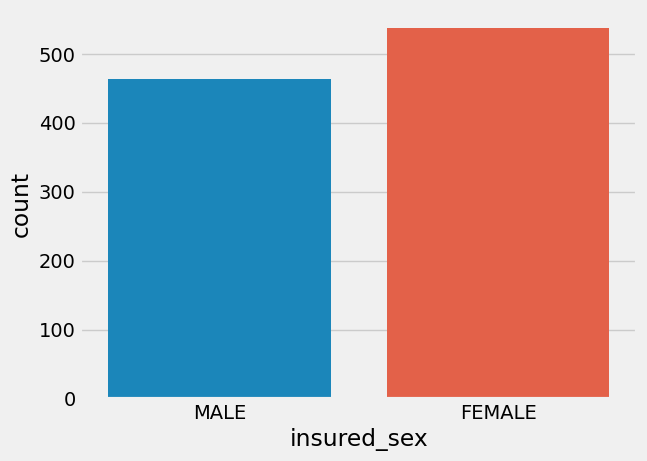

In [ ]:
#plot value counts
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='insured_sex', data=df)

In [ ]:
#cheking  the value count
df['insured_education_level'].value_counts()


JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

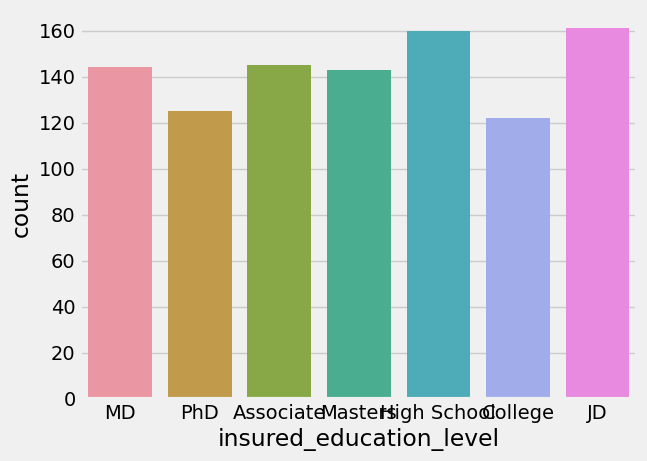

In [ ]:
#plot value counts
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='insured_education_level', data=df)

In [ ]:
#cheking  the value count
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

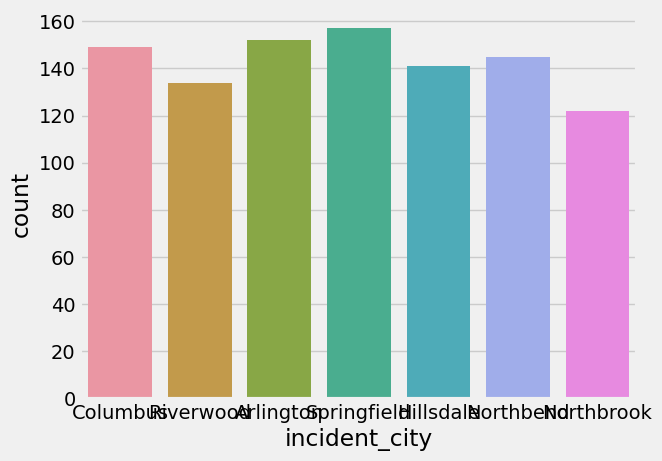

In [ ]:
#plot value counts
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='incident_city', data=df)

In [ ]:
#cheking  the value count
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [ ]:
# # BIVIRATE ANALYSIS

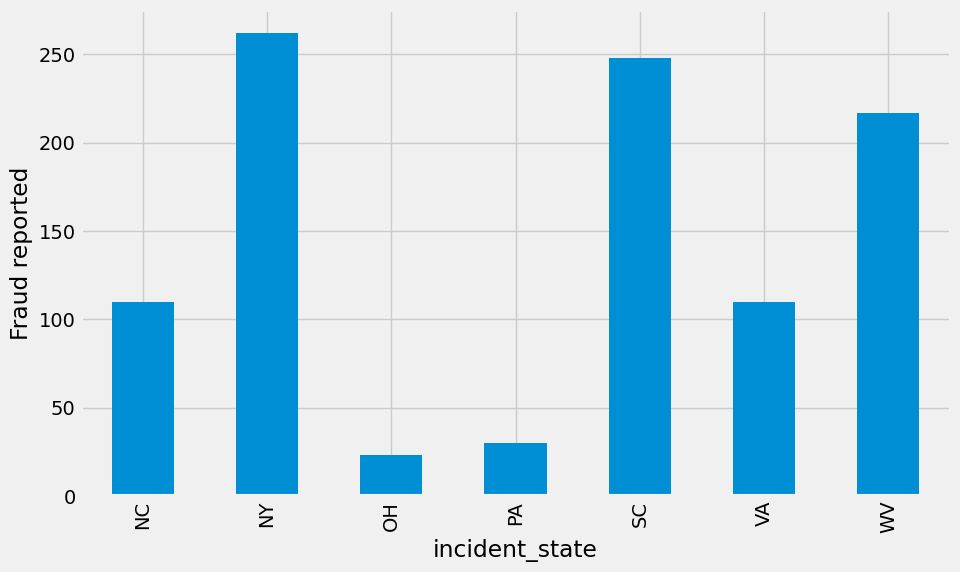

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

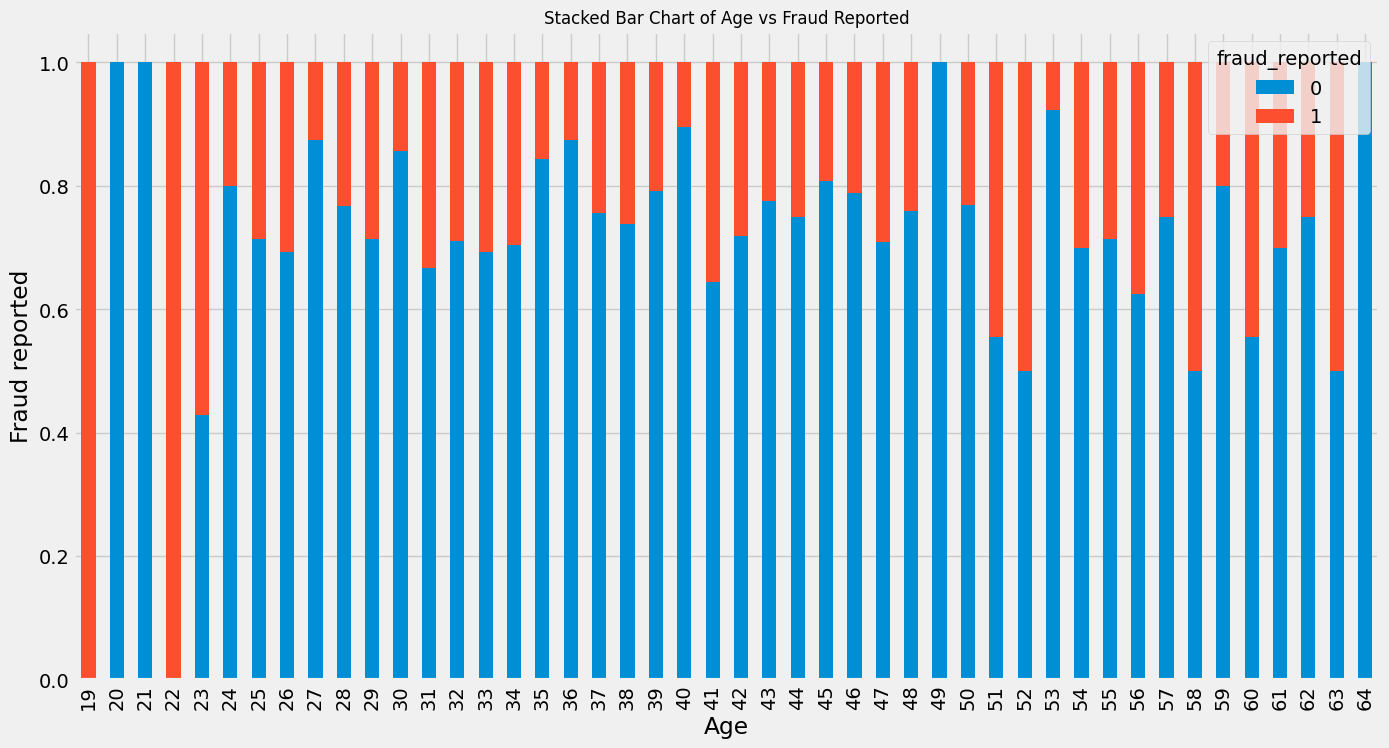

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()

From above plot, it is obvious that, age is an important predictor for fraud reported. Age between 19-23 shows substantial
number od fraud report.

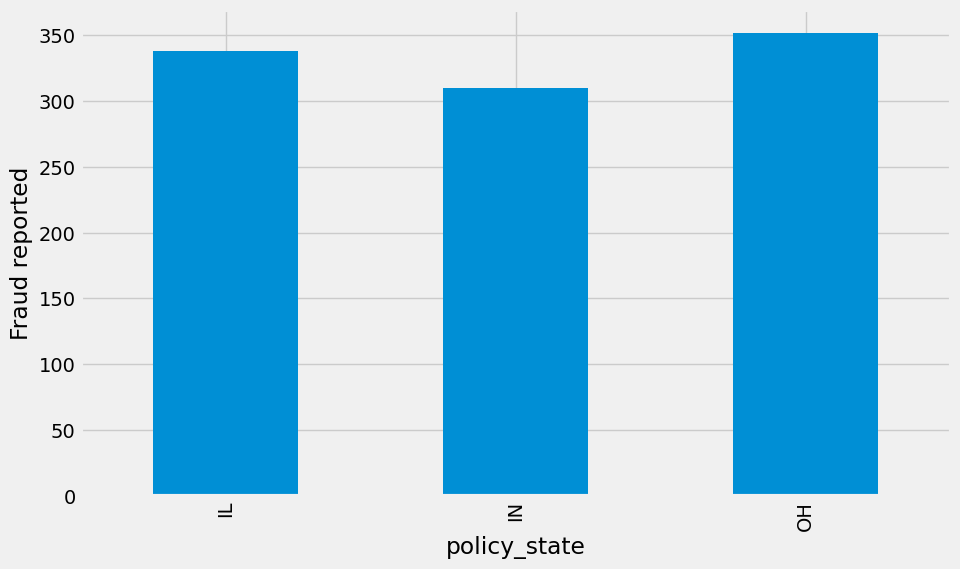

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

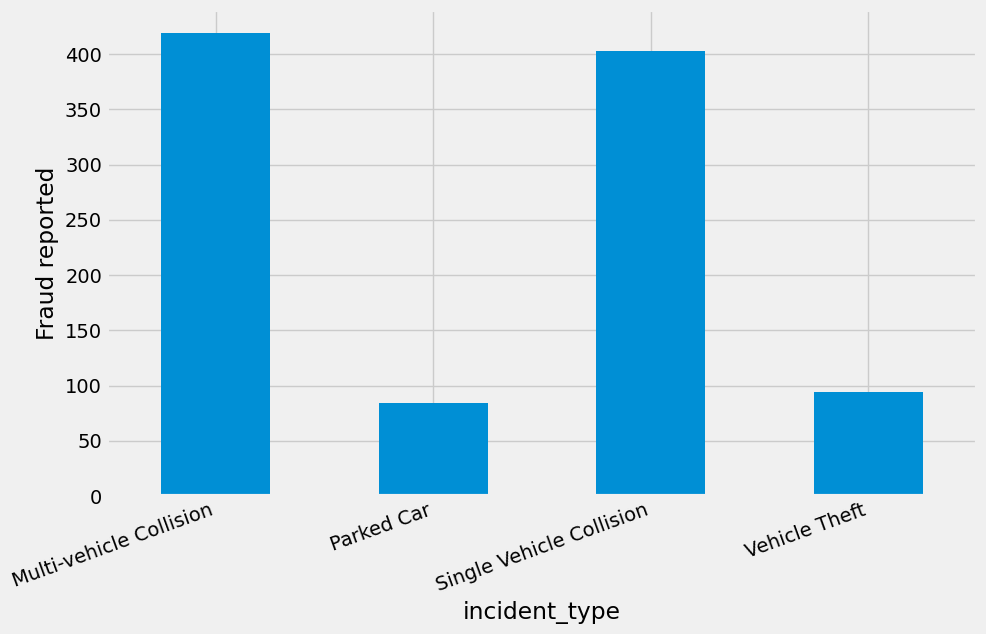

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

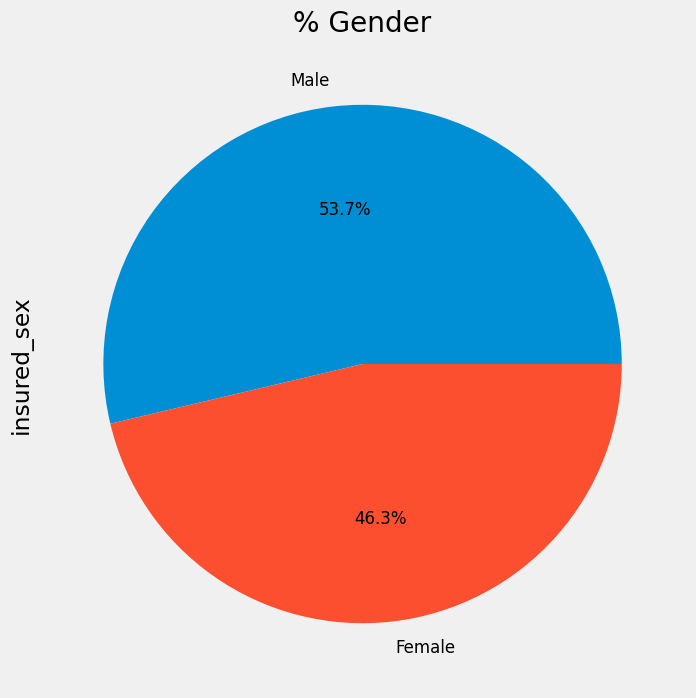

In [ ]:
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)
ax.set_title('% Gender')
plt.show()

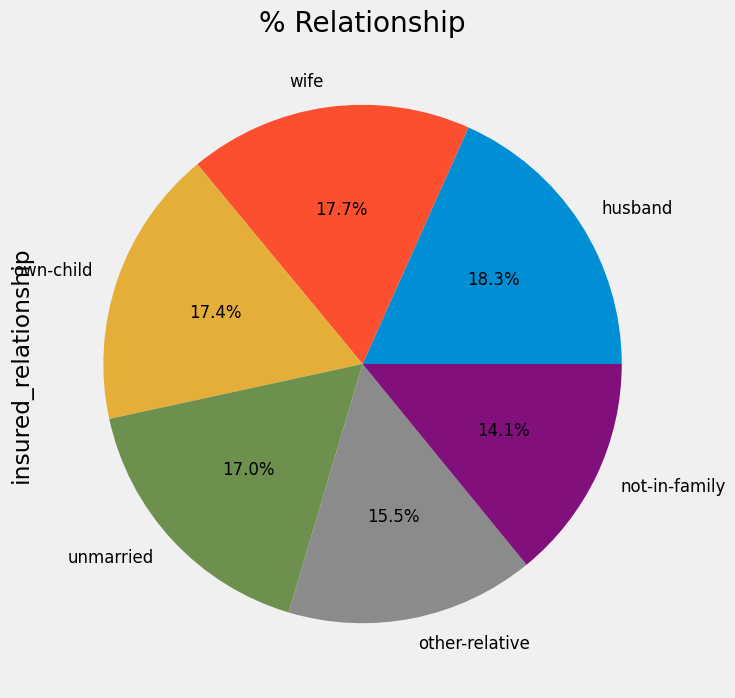

In [ ]:
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)
ax.set_title('% Relationship')
plt.show()

SO BY ABOVE EDA WE KNOW THAT WHICH FEATURE IS MORE  EFFACTABLE FOR LABEL

In [ ]:
# check correlation
corr=df.corr()
corr.shape

<ipython-input-31-ff44035051ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


(15, 15)

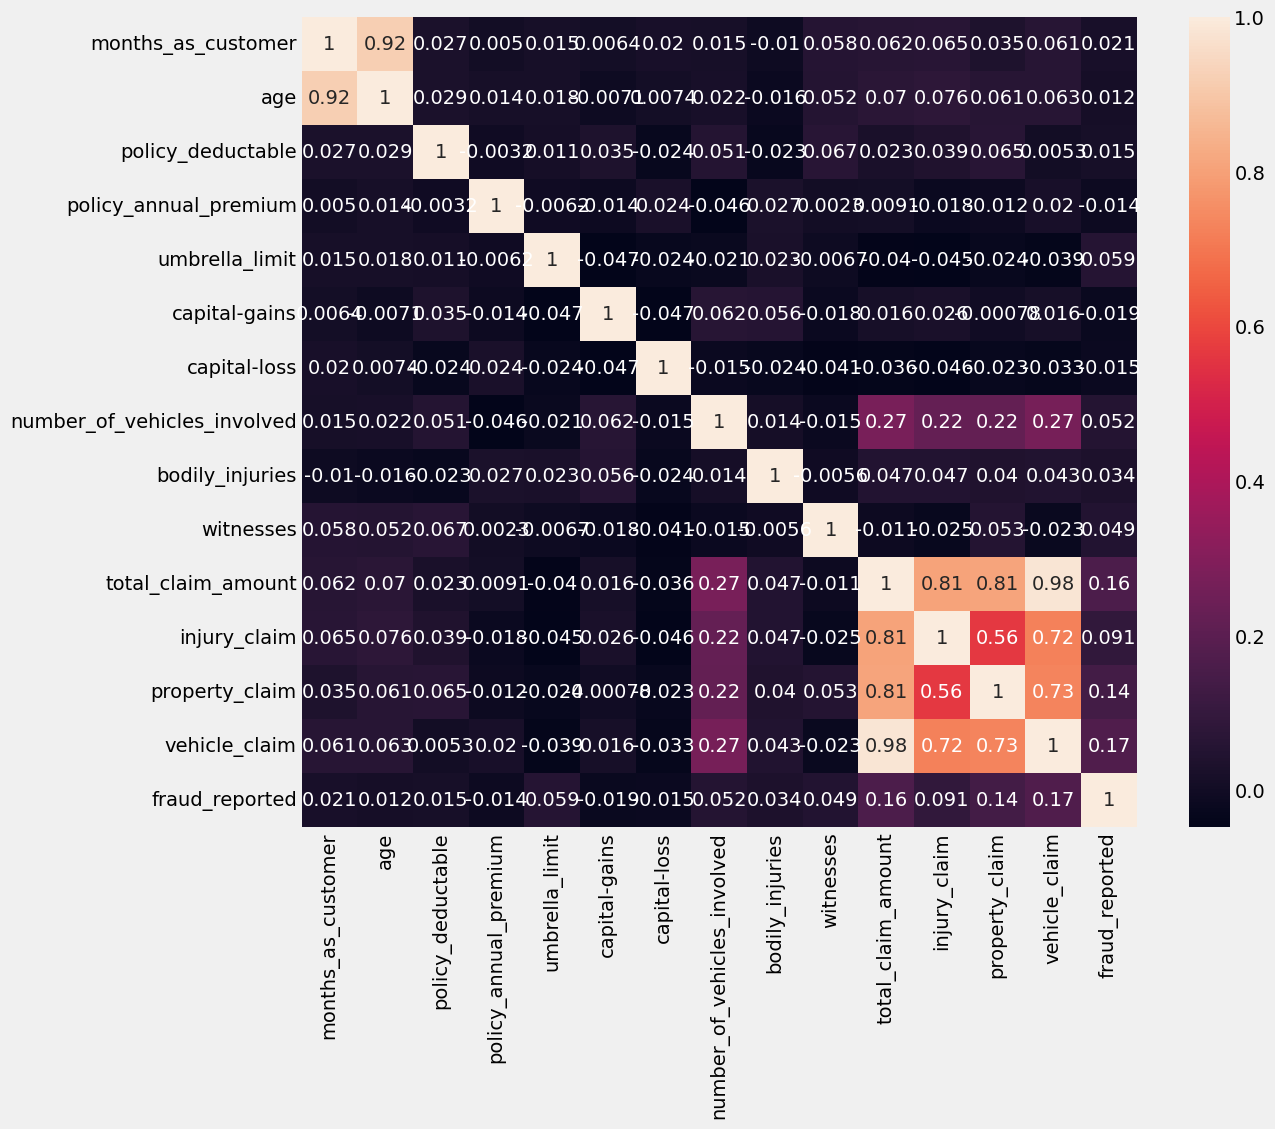

In [ ]:
# plotting the heat map to find the correlation bw feature
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

AS WE CAN SEE IN HEAT MAP 'INJURY CLAIM ',' PRORERTY CLAIM',AND'VECHIL CLAIM' ARE HIGHLY CORR WITH TOTAL CLAIM AMOUNT
SO I AM GOING TO DROP THESE COLUMNS

In [ ]:
# dropping unimportant columns

df = df.drop(columns = [
'injury_claim',
'property_claim',
'vehicle_claim'   ])


In [ ]:
# get numerics columns
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'fraud_reported'],
      dtype='object')

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [ ]:
# encoding
dummies = pd.get_dummies(df[[
    'policy_state',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'auto_make',
    'auto_model',
    'collision_type',
    'property_damage',
    'police_report_available']])

In [ ]:
dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df =df.join(dummies)# by joinig old data set will not delete but new data set will add

In [ ]:
df.shape

(1000, 170)

In [ ]:
df.head ()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,0,0,0,1,0,0,1,0,0,1
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,1,0,0,0,1,0,0,1,0,0
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,0,0,1,0,0,1,0,0,1,0
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,0,1,0,0,1,0,0,0,1,0
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
# now we have  new data then  then delete  catagorical data columns
df.drop(['policy_state',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'auto_make',
    'auto_model',
    'collision_type',
    'property_damage',
    'police_report_available'],axis=1,inplace=True)

In [ ]:
df.head ()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES
0,328,48,1000,1406.91,0,53300,0,1,1,2,...,0,0,0,1,0,0,1,0,0,1
1,228,42,2000,1197.22,5000000,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,...,0,0,1,0,0,1,0,0,1,0
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,...,0,1,0,0,1,0,0,0,1,0
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
#Devide dataset into features and labe
y= df['fraud_reported']
x =df.drop(['fraud_reported'], axis=1)
# standard scaler
scaler=StandardScaler()
x_scaler =scaler.fit_transform (x)
#Data split into train test
x_train, x_test, y_train, y_test = train_test_split (x_scaler, y, test_size=0.3, random_state=42)


In [ ]:
#Model confidence/accuracy

#write one function and call as many as times to check accuracy_score of different models
def metric_score(clf, x_train, x_test,y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n================Train Result======")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")

    elif train==False:
        pred = clf.predict(x_test)
        print("\n================TEST Result======")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))


# GradientBoostER

In [ ]:
#Initiate GradientBoostingclassifier
gbdt_clf= GradientBoostingClassifier ()

In [ ]:
#Train the model
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
# call the fn. and pass dataset to chek train and test score
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 97.71%

================TEST Result======
Accuracy Score: 79.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       220
           1       0.61      0.65      0.63        80

    accuracy                           0.80       300
   macro avg       0.74      0.75      0.75       300
weighted avg       0.80      0.80      0.80       300



# XGB

In [ ]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# call the fn. and pass dataset to chek train and test score
metric_score(xgb,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(xgb,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 100.00%

================TEST Result======
Accuracy Score: 79.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       220
           1       0.63      0.59      0.61        80

    accuracy                           0.80       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.79      0.80      0.79       300



# RANDOM FOREST

In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:
 rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# call the fn. and pass dataset to chek train and test score
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 100.00%

================TEST Result======
Accuracy Score: 72.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       220
           1       0.48      0.25      0.33        80

    accuracy                           0.73       300
   macro avg       0.62      0.57      0.58       300
weighted avg       0.69      0.73      0.69       300



# SVM

In [ ]:
from sklearn.svm import SVC
svc= SVC()

In [ ]:

svc.fit(x_train,y_train)

SVC()

In [ ]:
# call the fn. and pass dataset to chek train and test score
metric_score(svc,x_train,x_test,y_train,y_test,train=True)# for training
metric_score(svc,x_train,x_test,y_train,y_test,train=False)#for test


================Train Result======
Accuracy Score: 97.14%

================TEST Result======
Accuracy Score: 73.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       220
           1       0.50      0.12      0.20        80

    accuracy                           0.73       300
   macro avg       0.62      0.54      0.52       300
weighted avg       0.68      0.73      0.67       300



# HYPERPERAMETER TUNNING OF SVC BYGRID SEARCH

In [ ]:
from sklearn. model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[1,5,10, 20],
                  'gamma': [0.001,.01,0.2,0.002]
             }

In [ ]:
gridsearch =GridSearchCV(svc, param_grid)
gridsearch.fit (x_train, y_train)
# best parms
gridsearch.best_params_


{'C': 10, 'gamma': 0.002}

In [ ]:
svc =SVC (C= 10, gamma =.002)
svc.fit(x_train,y_train)
#Call the function and pass dataset to check train and test score
metric_score (svc, x_train, x_test, y_train,y_test, train=True)
metric_score (svc, x_train, x_test, y_train,y_test, train= False)


================Train Result======
Accuracy Score: 98.57%

================TEST Result======
Accuracy Score: 78.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       220
           1       0.62      0.49      0.55        80

    accuracy                           0.78       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300



# SO WE CAN SEE THAT SVM IS GOOD FOR MORE NO OF DATASET AND I AM CHOOSING SVM FOR THIS MODEL BUILDING


In [ ]:
# save the model
# now save the model
pickle.dump(svc,open('cla_INSURANCEFRAUD','wb'))